In [57]:
import rasterio
import numpy as np 
import matplotlib.pyplot as plt

# try this sample code from stackoverflow

# make sure input dtype is set to greyscale and unit16

# assumption: input layers already share the same extent, resolution and data type (check along the way)

file_list = [
    '../data/sample_data/example_red.tif',
    '../data/sample_data/example_green.tif', 
    '../data/sample_data/example_blue.tif',
    '../data/sample_data/example_rededge.tif',
    '../data/sample_data/example_nir.tif'
    ]

# write a mask for all nan values and mask the output file 
# Read metadata of first file
with rasterio.open(file_list[0]) as src0:
    meta = src0.meta
    testband = src0.read(1)
meta


{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': 0,
 'width': 3755,
 'height': 2984,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(3.672130279852581e-07, 0.0, 14.293207930901957,
        0.0, -2.246656976012673e-07, 52.390537498322836)}

In [37]:
# compare metadata 
with rasterio.open(file_list[2]) as src2:
    meta_check = src2.meta
meta_check
# crs, transform (mapping pixel to coordinate reference system) and extent are exactly the same for each layer

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': nan,
 'width': 3755,
 'height': 2984,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(3.672130279852581e-07, 0.0, 14.293207930901957,
        0.0, -2.246656976012673e-07, 52.390537498322836)}

In [55]:
# check max value as it's imported as float32 although it should be uint16
testband[~np.isnan(testband)].max()

6970.422

In [42]:
# Update meta to the number of total layers to stack
meta.update(count = len(file_list))

meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': nan,
 'width': 3755,
 'height': 2984,
 'count': 5,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(3.672130279852581e-07, 0.0, 14.293207930901957,
        0.0, -2.246656976012673e-07, 52.390537498322836)}

In [44]:
# Read each layer and write it to stack
with rasterio.open("../data/sample_data/stack.tif", "w", **meta) as dst:
    for id, layer in enumerate(file_list, start=1):
        print(id, layer)
        with rasterio.open(layer) as src1:
            band = src1.read(1)
            print(band[~np.isnan(band)].max())
            dst.write_band(id, src1.read(1))


1 ../data/sample_data/example_red.tif
6970.422
2 ../data/sample_data/example_green.tif
4692.2876
3 ../data/sample_data/example_blue.tif
3211.5457
4 ../data/sample_data/example_rededge.tif
8249.591
5 ../data/sample_data/example_nir.tif
8932.939


In [26]:
# Read in file
raster = rasterio.open("../data/sample_data/stack.tif")

# Read the raster band as separate variable
band1 = raster.read(1)

# Data type of the values
band1.dtype

# still float. why???

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [21]:
band1_nonan = band1[~np.isnan(band1)]
band1_nonan

array([1403.2349, 1401.5748, 1500.0499, ..., 1948.5144, 2148.2966,
       2151.5654], dtype=float32)

[{'min': 282.72656, 'mean': 1876.7418, 'median': 1756.863, 'max': 6970.422}, {'min': 260.27527, 'mean': 1486.3538, 'median': 1427.5527, 'max': 4692.2876}, {'min': 171.61177, 'mean': 890.85455, 'median': 856.5023, 'max': 3211.5457}, {'min': 510.4758, 'mean': 3288.1296, 'median': 3210.8376, 'max': 8249.591}, {'min': 723.1863, 'mean': 4011.3643, 'median': 3959.181, 'max': 8932.939}]


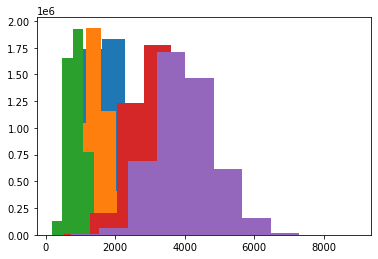

In [58]:
# Read all bands
array = raster.read()

# Calculate statistics for each band
stats = []

for band in array:

   band = band[~np.isnan(band)]

   stats.append({
      'min': band.min(),
      'mean': band.mean(),
      'median': np.median(band),
      'max': band.max()
      })

   plt.hist(band)

print(stats)
plt.show()


In [ ]:
# sieht doch ordentlich aus jetzt! 
# in QGIS ist der Datentyp auch float32
# einziger verbleibender Sorgenpunkt: in QGIS werden für die Bänder andere min/max werte angezeigt